🧬 Starting Fermentation Simulation with Monod Kinetics...
FERMENTATION SIMULATION SUMMARY
Model Parameters:
  Maximum growth rate (μ_max): 0.40 hr⁻¹
  Saturation constant (Ks): 1.00 g/L
  Biomass yield (Yx/s): 0.50 g/g
  Product yield (Yp/x): 0.80 g/g

Initial Conditions:
  Sugar: 100.0 g/L
  Biomass: 0.1 g/L
  Product: 0.0 g/L

Final Results (after 24.0 hours):
  Sugar: -0.00 g/L (100.0% consumed)
  Biomass: 50.10 g/L (501.0x increase)
  Product: 40.00 g/L

Conversion Efficiency:
  Sugar → Biomass: 0.500 g/g (theoretical: 0.500)
  Biomass → Product: 0.800 g/g (theoretical: 0.800)


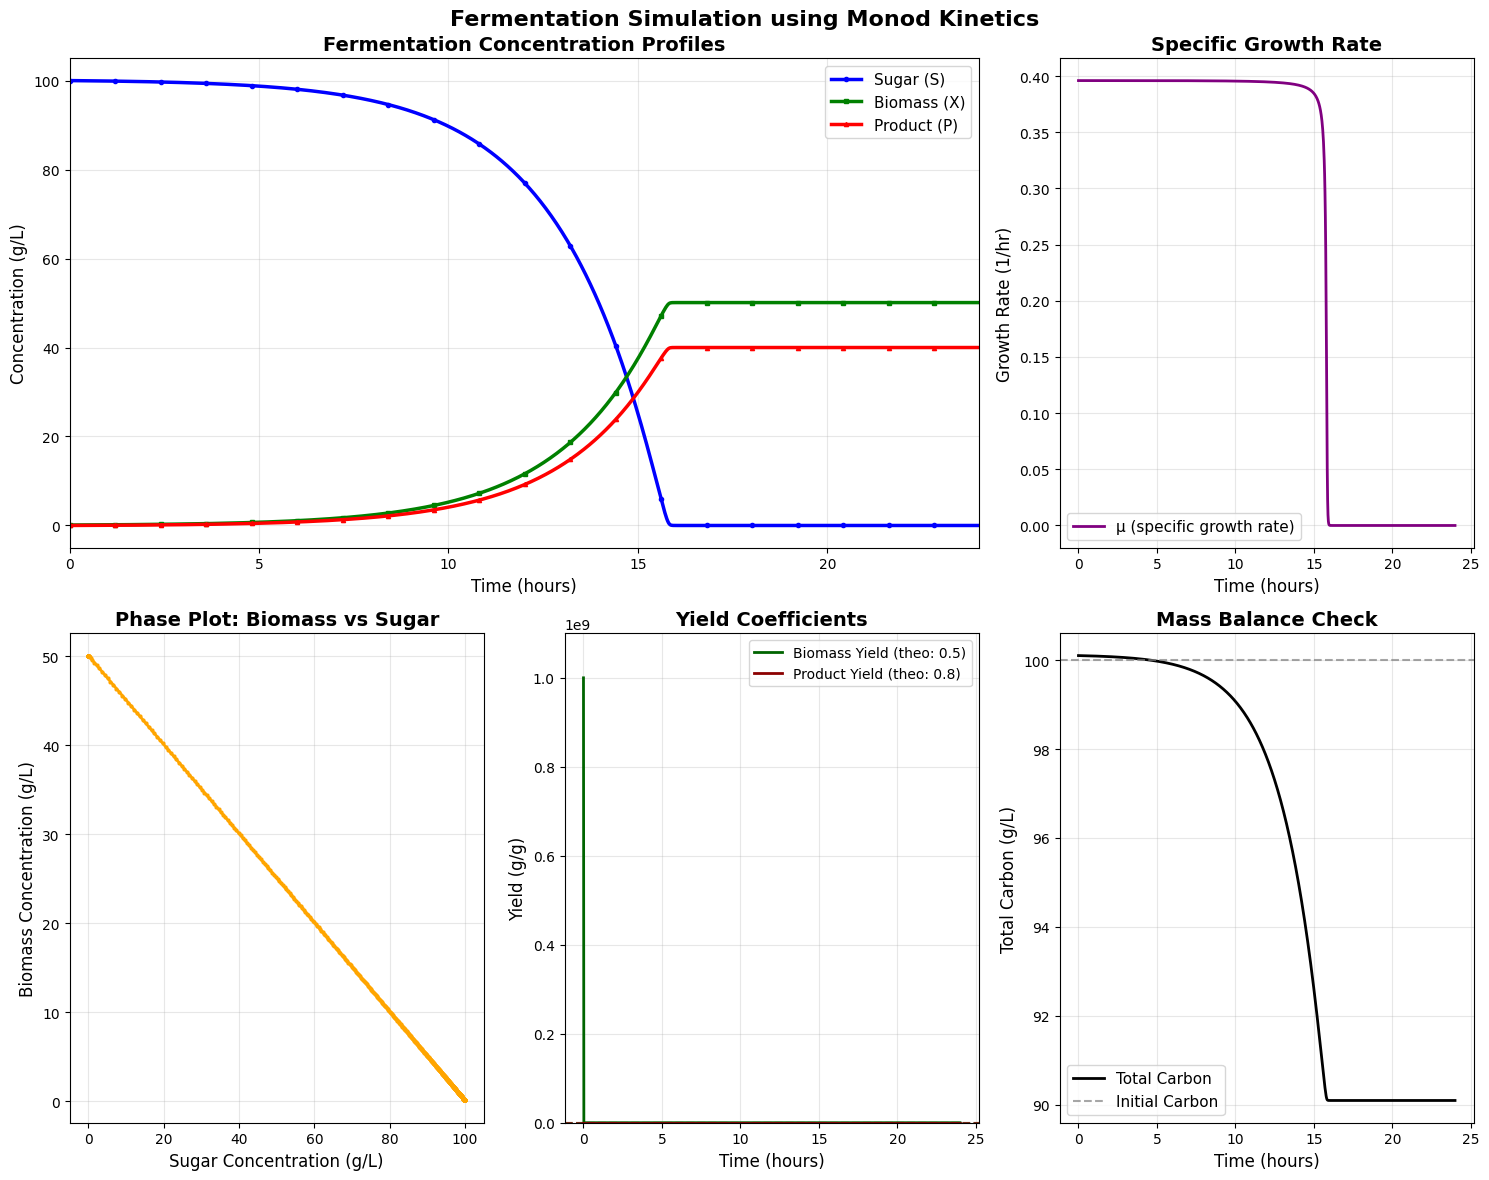


✅ Simulation completed successfully!

Key Observations:
• Sugar concentration decreases exponentially
• Biomass shows sigmoidal growth (S-curve)
• Product formation follows biomass growth
• Growth rate is highest when sugar is abundant


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

class FermentationSimulator:
    """
    Fermentation simulator using Monod kinetics model.
    Models yeast growth, substrate consumption, and product formation.
    """

    def __init__(self):
        # Model parameters (typical values for yeast fermentation)
        self.mu_max = 0.4      # Maximum specific growth rate (1/hr)
        self.Ks = 1.0          # Saturation constant (g/L)
        self.Yx_s = 0.5        # Biomass yield from substrate (g/g)
        self.Yp_x = 0.8        # Product yield from biomass (g/g)

        # Initial conditions
        self.S0 = 100.0        # Initial sugar concentration (g/L)
        self.X0 = 0.1          # Initial biomass concentration (g/L)
        self.P0 = 0.0          # Initial product concentration (g/L)

        # Simulation parameters
        self.time_end = 24.0   # Simulation time (hours)
        self.time_points = 1000

    def monod_kinetics(self, state, t):
        """
        Differential equations for fermentation kinetics.

        Args:
            state: [S, X, P] - substrate, biomass, product concentrations
            t: time

        Returns:
            [dS/dt, dX/dt, dP/dt] - rate of change for each component
        """
        S, X, P = state

        # Prevent negative concentrations
        S = max(0, S)
        X = max(0, X)

        # Specific growth rate using Monod equation
        if S > 0:
            mu = self.mu_max * S / (self.Ks + S)
        else:
            mu = 0

        # Rate equations
        dX_dt = mu * X                           # Biomass growth
        dS_dt = -(1/self.Yx_s) * dX_dt          # Substrate consumption
        dP_dt = self.Yp_x * dX_dt               # Product formation

        return [dS_dt, dX_dt, dP_dt]

    def run_simulation(self):
        """Run the fermentation simulation."""
        # Time points
        self.t = np.linspace(0, self.time_end, self.time_points)

        # Initial state
        initial_state = [self.S0, self.X0, self.P0]

        # Solve ODEs
        solution = odeint(self.monod_kinetics, initial_state, self.t)

        # Extract results
        self.S = solution[:, 0]  # Sugar concentration
        self.X = solution[:, 1]  # Biomass concentration
        self.P = solution[:, 2]  # Product concentration

        return self.t, self.S, self.X, self.P

    def calculate_rates(self):
        """Calculate instantaneous rates at each time point."""
        mu_rates = []
        growth_rates = []

        for i in range(len(self.t)):
            S_val = max(0, self.S[i])
            X_val = max(0, self.X[i])

            if S_val > 0:
                mu = self.mu_max * S_val / (self.Ks + S_val)
            else:
                mu = 0

            mu_rates.append(mu)
            growth_rates.append(mu * X_val)

        return np.array(mu_rates), np.array(growth_rates)

    def plot_results(self):
        """Create comprehensive plots of fermentation results."""
        # Calculate rates
        mu_rates, growth_rates = self.calculate_rates()

        # Create figure with subplots
        fig = plt.figure(figsize=(15, 12))
        fig.suptitle('Fermentation Simulation using Monod Kinetics', fontsize=16, fontweight='bold')

        # Main concentration profiles
        ax1 = plt.subplot(2, 3, (1, 2))
        ax1.plot(self.t, self.S, 'b-', linewidth=2.5, label='Sugar (S)', marker='o', markersize=3, markevery=50)
        ax1.plot(self.t, self.X, 'g-', linewidth=2.5, label='Biomass (X)', marker='s', markersize=3, markevery=50)
        ax1.plot(self.t, self.P, 'r-', linewidth=2.5, label='Product (P)', marker='^', markersize=3, markevery=50)

        ax1.set_xlabel('Time (hours)', fontsize=12)
        ax1.set_ylabel('Concentration (g/L)', fontsize=12)
        ax1.set_title('Fermentation Concentration Profiles', fontsize=14, fontweight='bold')
        ax1.legend(fontsize=11)
        ax1.grid(True, alpha=0.3)
        ax1.set_xlim(0, self.time_end)

        # Growth rate over time
        ax2 = plt.subplot(2, 3, 3)
        ax2.plot(self.t, mu_rates, 'purple', linewidth=2, label='μ (specific growth rate)')
        ax2.set_xlabel('Time (hours)', fontsize=12)
        ax2.set_ylabel('Growth Rate (1/hr)', fontsize=12)
        ax2.set_title('Specific Growth Rate', fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        ax2.legend(fontsize=11)

        # Phase plot: Biomass vs Substrate
        ax3 = plt.subplot(2, 3, 4)
        ax3.plot(self.S, self.X, 'orange', linewidth=2, marker='o', markersize=2)
        ax3.set_xlabel('Sugar Concentration (g/L)', fontsize=12)
        ax3.set_ylabel('Biomass Concentration (g/L)', fontsize=12)
        ax3.set_title('Phase Plot: Biomass vs Sugar', fontsize=14, fontweight='bold')
        ax3.grid(True, alpha=0.3)

        # Yield analysis
        ax4 = plt.subplot(2, 3, 5)
        consumed_sugar = self.S0 - self.S
        actual_yield_x = self.X / (consumed_sugar + 1e-10)  # Avoid division by zero
        actual_yield_p = self.P / (self.X + 1e-10)

        ax4.plot(self.t, actual_yield_x, 'darkgreen', linewidth=2, label=f'Biomass Yield (theo: {self.Yx_s})')
        ax4.axhline(y=self.Yx_s, color='darkgreen', linestyle='--', alpha=0.7)
        ax4.plot(self.t, actual_yield_p, 'darkred', linewidth=2, label=f'Product Yield (theo: {self.Yp_x})')
        ax4.axhline(y=self.Yp_x, color='darkred', linestyle='--', alpha=0.7)

        ax4.set_xlabel('Time (hours)', fontsize=12)
        ax4.set_ylabel('Yield (g/g)', fontsize=12)
        ax4.set_title('Yield Coefficients', fontsize=14, fontweight='bold')
        ax4.legend(fontsize=10)
        ax4.grid(True, alpha=0.3)
        ax4.set_ylim(0, max(1.0, max(actual_yield_x.max(), actual_yield_p.max()) * 1.1))

        # Mass balance check
        ax5 = plt.subplot(2, 3, 6)
        total_carbon = self.S + self.X + self.P
        ax5.plot(self.t, total_carbon, 'black', linewidth=2, label='Total Carbon')
        ax5.axhline(y=self.S0, color='gray', linestyle='--', alpha=0.7, label='Initial Carbon')
        ax5.set_xlabel('Time (hours)', fontsize=12)
        ax5.set_ylabel('Total Carbon (g/L)', fontsize=12)
        ax5.set_title('Mass Balance Check', fontsize=14, fontweight='bold')
        ax5.legend(fontsize=11)
        ax5.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def print_summary(self):
        """Print simulation summary statistics."""
        print("=" * 60)
        print("FERMENTATION SIMULATION SUMMARY")
        print("=" * 60)
        print(f"Model Parameters:")
        print(f"  Maximum growth rate (μ_max): {self.mu_max:.2f} hr⁻¹")
        print(f"  Saturation constant (Ks): {self.Ks:.2f} g/L")
        print(f"  Biomass yield (Yx/s): {self.Yx_s:.2f} g/g")
        print(f"  Product yield (Yp/x): {self.Yp_x:.2f} g/g")
        print()

        print(f"Initial Conditions:")
        print(f"  Sugar: {self.S0:.1f} g/L")
        print(f"  Biomass: {self.X0:.1f} g/L")
        print(f"  Product: {self.P0:.1f} g/L")
        print()

        print(f"Final Results (after {self.time_end:.1f} hours):")
        print(f"  Sugar: {self.S[-1]:.2f} g/L ({((self.S0-self.S[-1])/self.S0)*100:.1f}% consumed)")
        print(f"  Biomass: {self.X[-1]:.2f} g/L ({self.X[-1]/self.X0:.1f}x increase)")
        print(f"  Product: {self.P[-1]:.2f} g/L")
        print()

        # Calculate conversion efficiency
        sugar_consumed = self.S0 - self.S[-1]
        biomass_produced = self.X[-1] - self.X0
        product_produced = self.P[-1] - self.P0

        if sugar_consumed > 0:
            actual_biomass_yield = biomass_produced / sugar_consumed
            print(f"Conversion Efficiency:")
            print(f"  Sugar → Biomass: {actual_biomass_yield:.3f} g/g (theoretical: {self.Yx_s:.3f})")

        if biomass_produced > 0:
            actual_product_yield = product_produced / biomass_produced
            print(f"  Biomass → Product: {actual_product_yield:.3f} g/g (theoretical: {self.Yp_x:.3f})")

        print("=" * 60)

def main():
    """Main function to run the fermentation simulation."""
    print("🧬 Starting Fermentation Simulation with Monod Kinetics...")

    # Create simulator instance
    simulator = FermentationSimulator()

    # Run simulation
    t, S, X, P = simulator.run_simulation()

    # Display results
    simulator.print_summary()
    simulator.plot_results()

    print("\n✅ Simulation completed successfully!")
    print("\nKey Observations:")
    print("• Sugar concentration decreases exponentially")
    print("• Biomass shows sigmoidal growth (S-curve)")
    print("• Product formation follows biomass growth")
    print("• Growth rate is highest when sugar is abundant")

if __name__ == "__main__":
    main()